#### pandas 내장그래프 도구
- pandas는 Matplitlib 라이브러리의 기능을 일부 내장하고 있어서 별도로 임포트 하지 않고 간단히 그래프를 그릴 수 있음
- 선그래프 : df.plot() 메소드 적용 시 다른 옵션을 추가하지 않으면 기본적인 선그래프를 그림
- 막대그래프 : df.plot(kind = 'bar'), df.plot(kind = 'barh', stacked = True, alpha = 0.8)
- 히스토그램 : df.plot(kind = 'hist')
- 산점도 : df.plot(x = '', y = '', kind = 'scatter'), 상관관계를 볼 수 있음
- 박스 플롯 : df.plot(kind = 'box'), df.boxplot(colimn = ['feature']) 특정 변수의 데이터 분포와 분산 정도에 대한 정보를 제공

#### matplotlib
- histogram : plt.hist(x, bins = )
- line plot : plt.plot(x,y)
- plt.bar(x,y,color = '')
- scatter plot : plt.scatter(x,y)

#### seaborn
- sns.distplot(data, bins = , color = , kde = )
- sns.boxplot(x,y,data,color)
- sns.violinplot(x,y,data,color)
- sns.barplot(x,y,data,color)
- sns.jointplot(x,y,data,color)
- sns.pairplot(data,hue,palette)
- sns.lmplot(x,y,data,color)
- sns.regplot(x,y,data,fig_reg = False)

In [1]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv('./dataset/주가데이터.csv')
df

,연월일,당일종가,전일종가,시가,고가,저가,거래량
0,2018-07-02,10100,600,10850,10900,10000,137977
1,2018-06-29,10700,300,10550,10900,9990,170253
2,2018-06-28,10400,500,10900,10950,10150,155769
3,2018-06-27,10900,100,10800,11050,10500,133548
4,2018-06-26,10800,350,10900,11000,10700,63039
5,2018-06-25,11150,150,11400,11450,11000,55519
6,2018-06-22,11300,100,11250,11450,10750,134805
7,2018-06-21,11200,350,11350,11750,11200,133002
8,2018-06-20,11550,250,11200,11600,10900,308596
9,2018-06-19,11300,700,11850,11950,11300,180656


In [3]:
df.drop(['전일종가'],axis=1,inplace=True)
df.columns = ['Date','Close','Start','High','Low','Volume']
df.head()


,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


In [4]:
# Date를 datetime 으로 변경한 후 인덱스로 셋팅
df.Date = pd.to_datetime(df.Date)
df.set_index(df.Date,inplace =True)
df.drop('Date',axis = 1, inplace = True)
display(df,df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2018-07-02 to 2018-06-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   20 non-null     int64
 1   Start   20 non-null     int64
 2   High    20 non-null     int64
 3   Low     20 non-null     int64
 4   Volume  20 non-null     int64
dtypes: int64(5)
memory usage: 960.0 bytes


,Close,Start,High,Low,Volume
Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039
2018-06-25,11150,11400,11450,11000,55519
2018-06-22,11300,11250,11450,10750,134805
2018-06-21,11200,11350,11750,11200,133002
2018-06-20,11550,11200,11600,10900,308596


None

<AxesSubplot:xlabel='Date'>

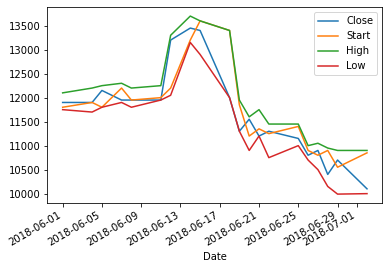

In [5]:
df.drop('Volume',axis = 1, inplace = True)
df.plot()

<AxesSubplot:xlabel='Date'>

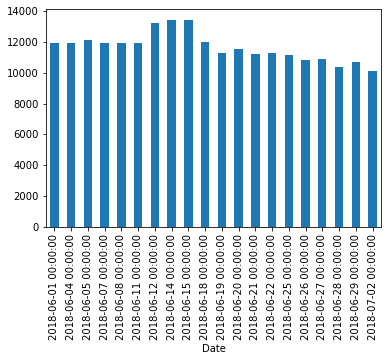

In [6]:
df1 = df.sort_index()
df1.Close.plot(kind = 'bar')

<AxesSubplot:xlabel='Date'>

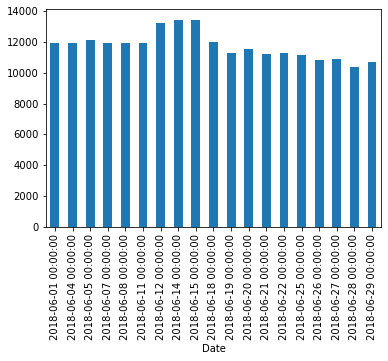

In [7]:
# Q. 6월 데이터만 추출해서 Close 칼럼으로 일별 막대 그래프를 표현하세요.
# df1.loc[df1.index<'2018-07-01'].Close.plot(kind='bar')
df1.loc['2018-06'].Close.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

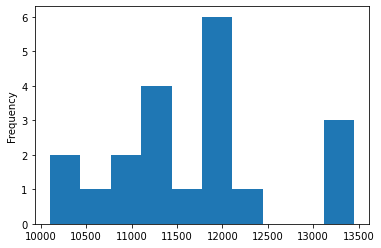

In [8]:
df1.Close.plot(kind = 'hist')

In [9]:
df.rename(columns = {'Volumn':'Volume'},inplace =True)
df

,Close,Start,High,Low
Date,,,,
2018-07-02,10100,10850,10900,10000
2018-06-29,10700,10550,10900,9990
2018-06-28,10400,10900,10950,10150
2018-06-27,10900,10800,11050,10500
2018-06-26,10800,10900,11000,10700
2018-06-25,11150,11400,11450,11000
2018-06-22,11300,11250,11450,10750
2018-06-21,11200,11350,11750,11200
2018-06-20,11550,11200,11600,10900


In [10]:
df.Volume.plot(kind='hist')

AttributeError: 'DataFrame' object has no attribute 'Volume'

In [ ]:
df.Volume.describe()

In [ ]:
import seaborn as sns
sns.histplot(df.Volume,kde=True)

In [ ]:
# 산점도
df.plot(x = 'Close',y = 'Volume',kind = 'scatter')

In [ ]:
# Box Plot
df.Close.plot(kind = 'box')

#### Box plot 의미 해석
- IQR(Inter Quartile Range) : 제 3사분위수(Q3) - 제 1사분위수(Q1)
- lower whisker : Q1 - 1.5 * IQR 이내인 값 중에서 최소값
- upper whisker : Q3 + 1.5 * IQR 이내인 값중에서 최대값
- 이상치 : lower whisker, upper whisker를 벗어나는 값

In [ ]:
df.Close.describe()

In [ ]:
# Q. Close 칼럼의 이상치를 구하세요.
Q1 = df.Close.quantile(.25)
Q3 = df.Close.describe()['75%']
IQR = Q3 - Q1
uw_check = Q3 + 1.5 * IQR
print(df.Close.sort_values(ascending=False))
df.Close.loc[df.Close > Q3 + 1.5 * IQR]


count       20.000000
mean     11755.000000
std        865.250192
min      10550.000000
25%      11125.000000
50%      11800.000000
75%      12050.000000
max      13600.000000
Name: Start, dtype: float64 

13437.5 

9737.5 

Date
2018-06-15    13600
2018-06-18    13400
2018-06-14    13200
2018-06-07    12200
2018-06-12    12200
2018-06-11    12000
2018-06-08    11950
2018-06-04    11900
2018-06-19    11850
2018-06-05    11800
2018-06-01    11800
2018-06-25    11400
2018-06-21    11350
2018-06-22    11250
2018-06-20    11200
2018-06-26    10900
2018-06-28    10900
2018-07-02    10850
2018-06-27    10800
2018-06-29    10550
Name: Start, dtype: int64 



Date
2018-06-15    13600
Name: Start, dtype: int64

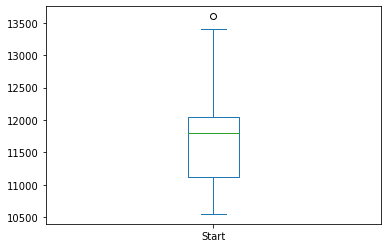

In [12]:
# [과제] Start 칼럼의 분포 및 이상치 여부를 탐색하는 Box Plot 및 이상치를 구하세요.
df.Start.plot(kind = 'box')
print(df.Start.describe(),'\n')
q1 = df.Start.describe()['25%']
q3 = df.Start.describe()['75%']
iqr = q3 - q1
uw = q3 + 1.5 * iqr
lw = q1 - 1.5 * iqr
print(uw,'\n')
print(lw,'\n')
print(df.Start.sort_values(ascending=False),'\n')
df.Start.loc[df.Start > uw]

11125.0 12050.0 925.0
9737.5 13437.5


<AxesSubplot:>

Date
2018-06-15    13600
Name: Start, dtype: int64

Date
2018-06-15    13600
2018-06-18    13400
Name: Start, dtype: int64

Date
2018-06-27    10800
2018-06-29    10550
Name: Start, dtype: int64

lower whisker: 10,550
upper whisker: 13,400


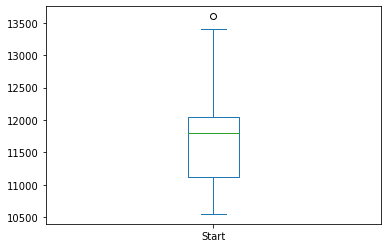

In [13]:
Q1 = df.Start.quantile(.25)
Q3 = df.Start.describe()['75%']
IQR = Q3-Q1
print(Q1,Q3,IQR)
print(Q1-(1.5*IQR),Q3+(1.5*IQR))
display(df.Start.plot(kind='box'))
df1 = df.sort_values('Start',ascending=False)
display(df1.loc[(df1.Start>(Q3+1.5*IQR))|(df1.Start<(Q1-1.5*IQR)),'Start'])
display(df1.Start.head(2),df1.Start.tail(2))
print('''lower whisker: 10,550
upper whisker: 13,400''')


 [과제] df_ep 데이터 프래임으로 다음을 수행하세요
- 선그래프
- 'south' 칼럼의 막대그래프
- 'south' 칼럼의 히스토그램
- box plot

<AxesSubplot:xlabel='year'>

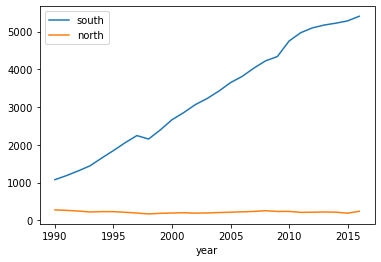

In [31]:
import pandas as pd
df = pd.read_excel('./dataset/df_ep.xlsx')
df.set_index('year',inplace=True)
df.plot()

<AxesSubplot:xlabel='year'>

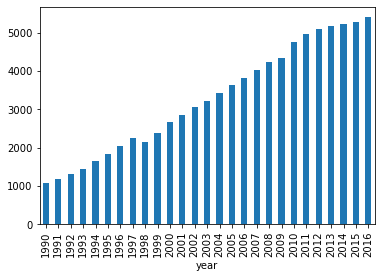

In [32]:
df.south.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

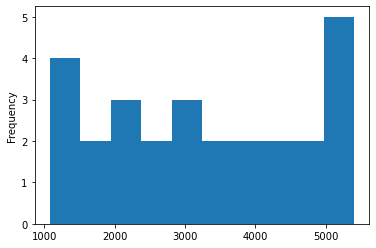

In [33]:
df.south.plot(kind='hist')

<AxesSubplot:>

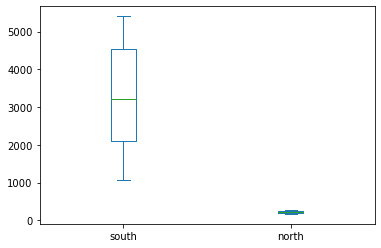

In [34]:
df.plot(kind='box')

<AxesSubplot:>

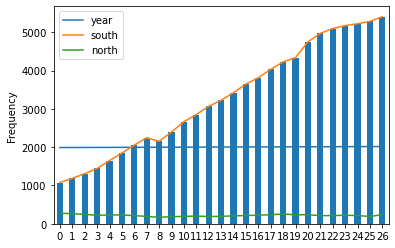

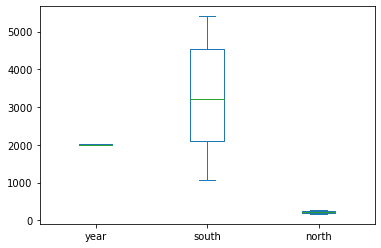

In [29]:
# df_ep 엑셀파일을 데이터프레임으로 불러오기
df_ep = pd.read_excel('./dataset/df_ep.xlsx')
df_ep.head()

# 선 그래프
df_ep.plot()

# 'south' 칼럼의 막대그래프
df_ep.south.plot(kind='bar')

# 'south' 칼럼의 히스토그램
df_ep.south.plot(kind='hist')

# box plot
df_ep.plot(kind='box')


In [ ]:
# [과제] df_auto의 각 칼럼을 시각화해서 탐색한 후 인사이트를 기술하세요(5개 이상)


In [ ]:
df_auto.displacement.plot(kind='hist')

In [ ]:
df_auto.displacement.value_counts()

In [ ]:
import matplotlib.pyplot as plt
np.random.seed(0)
data = np.arange(50) + np.random.randint(1,10,50)
plt.hist(data, bins = 20)

In [ ]:
import numpy as np
x = np.arange(1,21,2)
y = np.array([3,5,6,13,30,21,22,29,33,32])
plt.figure(figsize=(10,6))
plt.plot(x,y,color = 'blue',marker='o',markersize = 5)
plt.xlabel('x',size = 15)
plt.ylabel('y',size = 15)
plt.legend(labels=['lineplot'])

In [ ]:
import numpy as np
np.random.seed(0)
x = np.arange(20)
y1 = np.arange(20)*2 + np.random.randn(20)*10
y2 = np.arange(20)*2 + np.random.randn(20)

plt.figure(figsize=(10,6))
plt.plot(x,y1)
plt.plot(x,y2,color = 'magenta',marker='o',markersize = 5)
plt.xlabel('x',size = 20)
plt.ylabel('y',size = 20)
plt.legend(labels=['A','B'])
plt.title('Line Graph',size=30)

In [ ]:
# 막대그래프
y = np.random.randint(2,10,10)
x = range(len(y))
plt.figure(figsize=(10,6))
plt.bar(x,y,width=0.8,color = 'skyblue')
plt.ylabel('Y')
plt.xlabel('X')

In [ ]:
import pandas as pd
df = pd.read_csv('./dataset/movie.csv')
df

In [ ]:
# movie.csv에서 x축 movieNm, y축 salesAmt로 막대 그래프를 그리세요.
import matplotlib as mpl
mpl.rc('font', family = 'Malgun Gothic') # 한글폰트 설정
mpl.rcParams['axes.unicode_minus'] = False #마이너스 단위 처리
y = df.salesAmt
x = df.movieNm
plt.figure(figsize=(10,10))
plt.bar(x,y,width=0.8,color = 'red')
plt.title('영화별 총 매출액', size=30)
plt.ylabel('매출액',size = 20)
plt.xlabel('영화명', size = 20)
plt.xticks(color = 'red', rotation = 45) # x축 글자 속성

In [ ]:
import warnings
warnings.filterwarnings('ignore')
x = df['movieNm'].tolist()
y = df['salesAmt'].tolist()
plt.figure(figsize=(10,6))
plt.bar(x,y,width=0.8,color='olive')
plt.xlabel('Movie Name')
plt.ylabel('Sales Amount')


In [ ]:
# scatter plot
df_auto = pd.read_excel('./dataset/auto-mpg.xlsx',engine = 'openpyxl')
x = df_auto.mpg
y = df_auto.weight
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='skyblue')
plt.xlabel('mpg',size =20)
plt.ylabel('weight',size = 20)

In [ ]:
#histogram
plt.hist(x,bins=20,color='gray')

In [ ]:
fig = plt.figure(figsize=(12,8))
# figure 가 2 x 2 크기이고 4개의 서브플롯
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(np.random.randn(10000), bins = 20 , color = 'k', alpha = 0.7)
ax2.hist(np.random.rand(10000),bins = 20, color='k', alpha=0.7)
ax3.plot(np.random.randn(50).cumsum(), 'k--')
ax4.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))


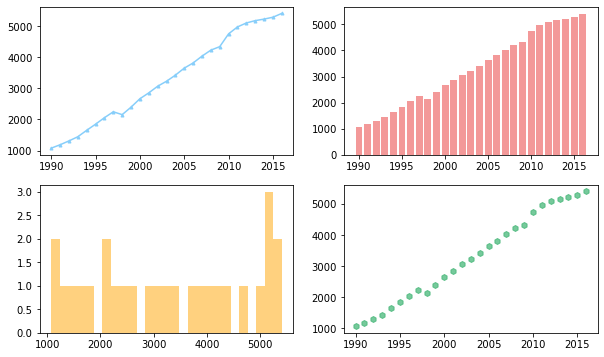

In [16]:
# [과제] 히스토그램, 선, 막대, 산점도 그래프 4개를 서브플롯으로 출력하세요.
import matplotlib.pyplot as plt
df_ep = pd.read_excel('./dataset/df_ep.xlsx')
df_ep.set_index('year',inplace=True)
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

plt.xlabel
ax1.plot(df_ep.south,color='lightskyblue',marker='^',markersize=3)
ax2.bar(df_ep.index,df_ep.south,color='lightcoral',width=0.8,alpha=0.8)
ax3.hist(df_ep.south,bins=len(df_ep),color='orange',alpha=0.5)
ax4.scatter(df_ep.index,df_ep.south,color='mediumseagreen',alpha=0.7,marker='h')


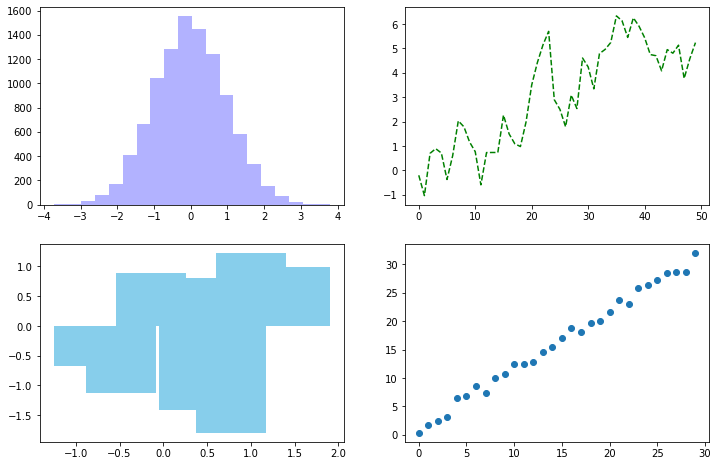

In [22]:
fig = plt.figure(figsize=(12,8))
# figure가 2x2 크기이고 4개의 서브플룻
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
np.random.seed(0)
ax1.hist(np.random.randn(10000), bins=20, color='blue',alpha=0.3)
ax2.plot(np.random.randn(50).cumsum(), 'g--')
ax3.bar(np.random.randn(10),np.random.randn(10),width=0.8,color = 'skyblue' )
ax4.scatter(np.arange(30),np.arange(30)+3*np.random.rand(30))


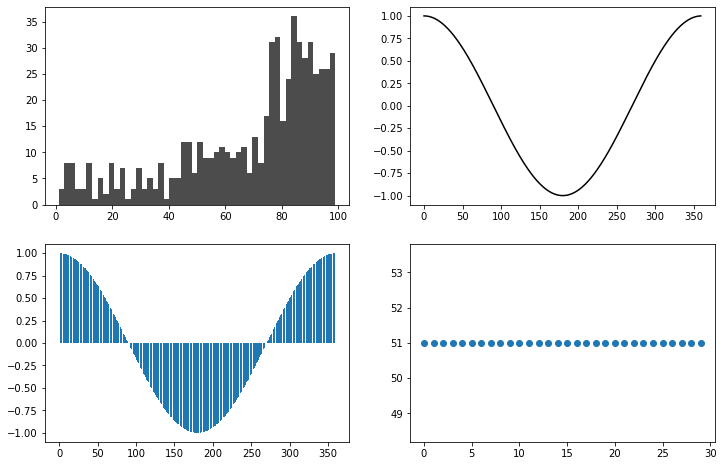

In [23]:
import math
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

#=======================히스토그램=======================
num=np.zeros(600)
for i in range(100): num[i]=np.random.randint(1,45)
for i in range(100,250): num[i]=np.random.randint(45,75)
for i in range(250,600): num[i]=np.random.randint(75,100)    
ax1.hist(num, bins = 50, color ='k',alpha = 0.7) 
#=======================선=======================
x=np.arange(360)
y=[]
for i in x:
    a=math.cos(math.pi*(i/180))
    y.append(a)    
ax2.plot(x,y,  color = 'k')
#=======================막대=======================
ax3.bar(x,y,width=0.8)
#=======================산점도=======================
sc_x=np.arange(30)
sc_y=np.full(30,51)
ax4.scatter(sc_x,sc_y)


In [ ]:
from numpy .random import randn
plt.figure(figsize=(10,6))
plt.plot(randn(30).cumsum(), linestyle = 'dashed', color = 'b', marker = 'o')

In [37]:
t3 = pd.read_csv('./dataset/titanic3.csv')
t3

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [ ]:
# Q. t3에서 age열을 범주화한 후 age_cat 열을 추가하세요.
for i in len(t3):
    if i < 8

In [38]:
def catage(age):
    cat = ''
    if age<10: cat='Child'
    elif age<20: cat='Teen'
    elif age<30: cat='20s'
    elif age<40: cat='30s'
    elif age<50: cat='40s'
    elif age<60: cat='50s'
    else: cat='Eldery'
    return cat
t3['age_cat'] = t3.age.apply(lambda x:catage(x))
t3.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",20s
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Child
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Child
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",30s
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",20s


         pclass  survived      age  sibsp  parch       fare    body  Ratio
age_cat                                                                   
20s         838       127  8402.00    112     77  9198.3038  5125.0    344
30s         488        98  7855.50     80     73  9578.5332  5020.0    232
40s         250        52  5958.50     50     68  5723.5168  3429.0    135
50s         101        32  3751.50     29     21  4384.9541  1889.0     70
Child       216        50   330.17    135    114  2403.4248     4.0     82


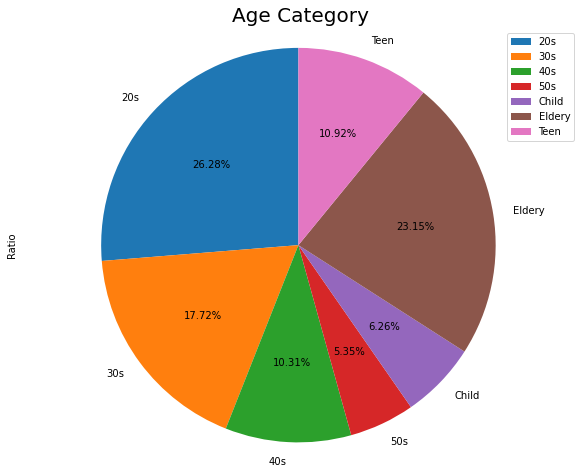

In [39]:
t3['Ratio'] = 1
df_age_cat = t3.groupby('age_cat').sum()
print(df_age_cat.head())

df_age_cat.Ratio.plot(kind='pie',
                     figsize=(10,8),
                     autopct= '%.2f%%',
                     startangle = 90)
plt.title('Age Category', size = 20)
plt.axis('equal')
plt.legend(labels = df_age_cat.index, loc = 'best')

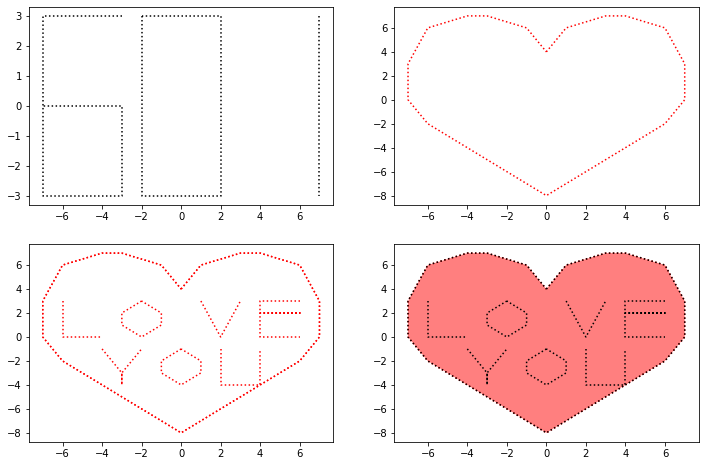

In [41]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

x = [0,1,3,4,6,7,7,6,5,4,3,0,-3,-4,-5,-6,-7,-7,-6,-4,-3,-1,0]
y = [4,6,7,7,6,3,0,-2,-3,-4,-5,-8,-5,-4,-3,-2,0,3,6,7,7,6,4]

def heart(axis):
    axis.plot(x,y,'red',linestyle=':')

def loveu(axis,color):
    x1 = [0,1,3,4,6,7,7,6,5,4,3,0,-3,-4,-5,-6,-7,-7,-6,-4,-3,-1,0]
    y1 = [4,6,7,7,6,3,0,-2,-3,-4,-5,-8,-5,-4,-3,-2,0,3,6,7,7,6,4] ; axis.plot(x1,y1,color,linestyle=':')
    x2 = [-6,-6,-4]
    y2 = [3,0,0] ; axis.plot(x2,y2,color,linestyle=':')
    x3 = [-2,-3,-3,-2,-1,-1,-2]
    y3 = [3,2,1,0,1,2,3] ; axis.plot(x3,y3,color,linestyle=':')
    x4 = [1,2,3]
    y4 = [3,0,3] ; axis.plot(x4,y4,color,linestyle=':')
    x5 = [6,4,4,6,4,4,6]
    y5 = [3,3,2,2,2,0,0] ; axis.plot(x5,y5,color,linestyle=':')
    x6 = [-4,-3,-3,-3,-2]
    y6 = [-1,-3,-4,-3,-1] ; axis.plot(x6,y6,color,linestyle=':')
    x7 = [0,-1,-1,0,1,1,0]
    y7 = [-1,-2,-3,-4,-3,-2,-1] ; axis.plot(x7,y7,color,linestyle=':')
    x8 = [2,2,4,4]
    y8 = [-1,-4,-4,-1] ; axis.plot(x8,y8,color,linestyle=':')

def class601(axis):
    x9 = [-3,-7,-7,-3,-3,-7]
    y9 = [3,3,-3,-3,0,0] ; axis.plot(x9,y9,'black',linestyle=':')
    x10 = [-2,-2,2,2,-2]
    y10 = [3,-3,-3,3,3] ; axis.plot(x10,y10,'black',linestyle=':')
    x11 = [7,7]
    y11 = [3,-3] ; axis.plot(x11,y11,'black',linestyle=':')

class601(ax1)
heart(ax2)
heart(ax3)
loveu(ax3,'red')
heart(ax4)
loveu(ax4,'black')
ax4.fill(x,y,'r',alpha=0.5)

<AxesSubplot:xlabel='length', ylabel='Count'>

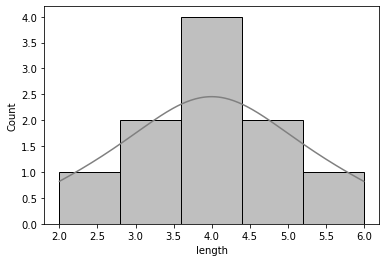

In [47]:
# 물고기 종류별 몸길이
import seaborn as sns
import pandas as pd
df = pd.read_csv('dataset/4_fm2.csv')
# 종류별 몸길이 데이터 추출
lenth_a = df.query('species=="A"')['length']
lenth_b = df.query('species=="B"')['length']
sns.histplot(lenth_a,color = 'gray',kde=True)

<AxesSubplot:xlabel='species', ylabel='length'>

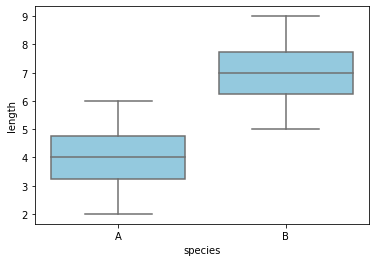

In [49]:
sns.boxplot(x='species',y='length',data=df,color ='skyblue')

<AxesSubplot:xlabel='species', ylabel='length'>

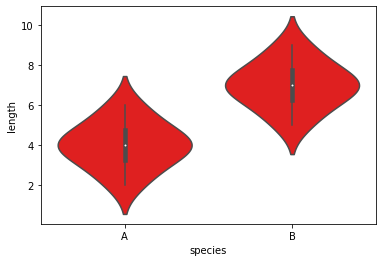

In [50]:
# 바이올린 플롯
sns.violinplot(x='species',y='length',data=df,color='red')

In [54]:
df1 = df.copy()
df1.iloc[5,1] = 10
df1.iloc[10,1] = 2

count    20.000000
mean      5.650000
std       2.277464
min       2.000000
25%       4.000000
50%       6.000000
75%       7.000000
max      10.000000
Name: length, dtype: float64 

11.5 

-0.5 



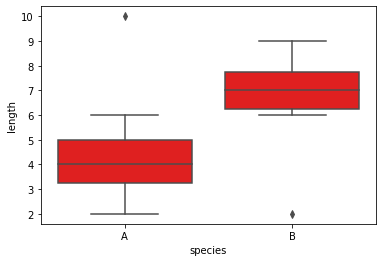

In [59]:
# [과제] df1으로 박스플롯을 확인한 후 이상치를 구하세요.
sns.boxplot(x='species',y='length',data=df1,color='red')
print(df1.length.describe(),'\n')
q1 = df1.length.describe()['25%']
q3 = df1.length.describe()['75%']
iqr = q3 - q1
uw = q3 + 1.5 * iqr
lw = q1 - 1.5 * iqr
print(uw,'\n')
print(lw,'\n')

C:\Users\admin\Anaconda3\envs\cakd5\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


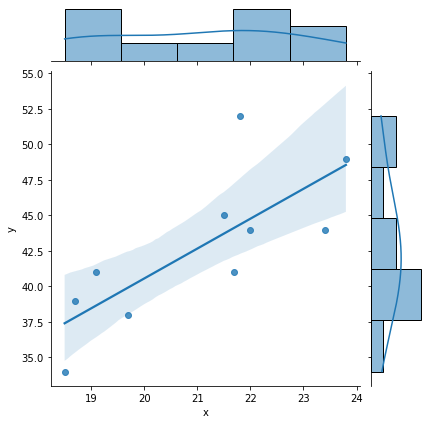

In [63]:
import warnings

cov_df = pd.read_csv('dataset/4_cov.csv')
sns.jointplot(cov_df.x,cov_df.y,kind='reg')

In [64]:
df_auto = pd.read_excel('dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


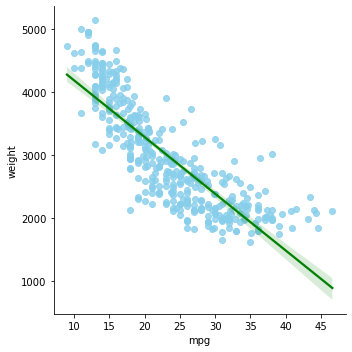

In [66]:
sns.lmplot(x='mpg',y='weight',data=df_auto,scatter_kws={'color':'skyblue'},line_kws={'color':'green'})

<AxesSubplot:xlabel='mpg', ylabel='weight'>

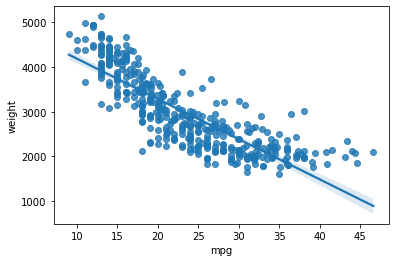

In [67]:
sns.regplot(x='mpg',y='weight',data=df_auto,fit_reg=True)

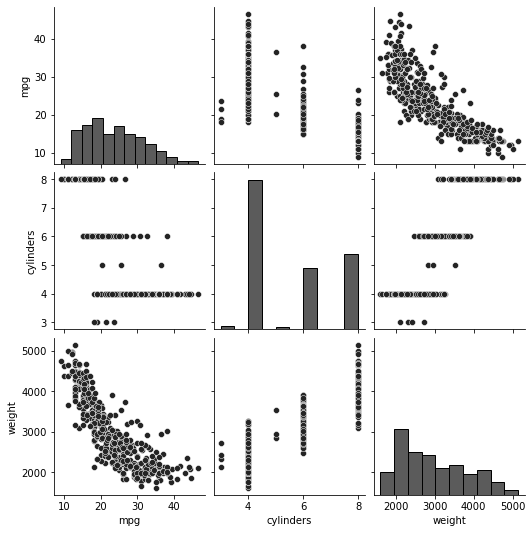

In [82]:
df2 = df_auto[['mpg','cylinders','weight']]
sns.set_palette('gray')
sns.pairplot(df2)

Text(0.5, 1.0, 'Heatmap of the Dataset')

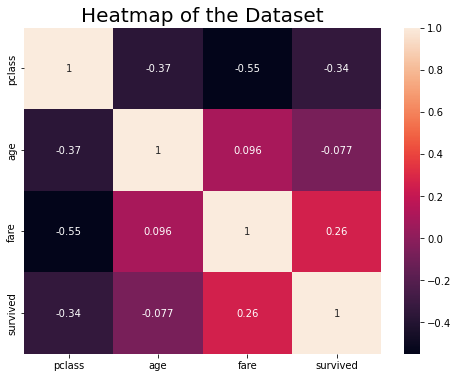

In [92]:
import matplotlib.pyplot as plt
tdf = sns.load_dataset('titanic')
plt.figure(figsize = (8,6))
sns.heatmap(tdf[['pclass','age','fare','survived']].corr(),annot =True)
plt.title('Heatmap of the Dataset', fontsize = 20)

In [93]:
table = tdf.pivot_table(index=['sex'],columns=['class'],values=['survived'],aggfunc='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<AxesSubplot:xlabel='None-class', ylabel='sex'>

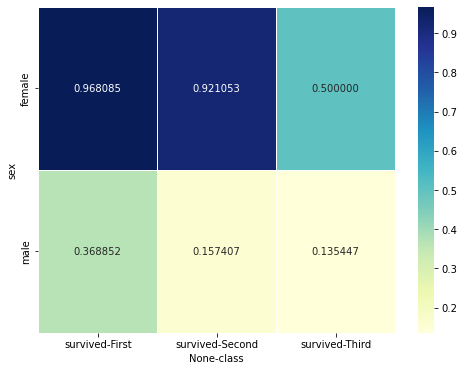

In [95]:
plt.figure(figsize = (8,6))
sns.heatmap(table,
           annot = True,fmt='f',
           cmap = 'YlGnBu',
           linewidth=.5,
           cbar = True)